In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

#Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("C:\\Users\\emman\\Desktop\\ML-Zoomcamp  projects\\raw.githubusercontent.com_alexeygrigorev_datasets_master_housing.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#1-Look at the median_house_value variable. Does it have a long tail? NO.

C:\Users\emman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

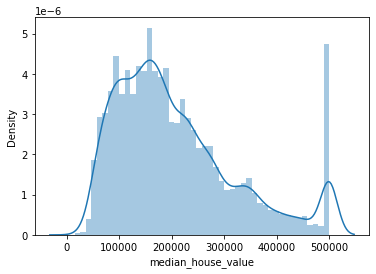

In [4]:
sns.distplot(df['median_house_value'])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

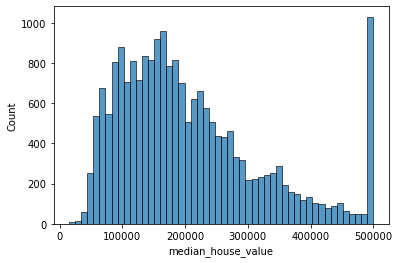

In [5]:
sns.histplot(df['median_house_value'], bins=50)

#First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

In [6]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
ocean_prox_1H_Inland = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [9]:
ocean_prox_1H_Inland

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
# confirmation of either <1H OCEAN or INLAND

ocean_prox_1H_Inland['ocean_proximity'].value_counts()

<1H OCEAN    9136
INLAND       6551
Name: ocean_proximity, dtype: int64

In [11]:
# reset index of the dataset

ocean_prox_1H_Inland = ocean_prox_1H_Inland.reset_index(drop=True)
ocean_prox_1H_Inland

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#Next, use only the following columns:'latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'

In [12]:
ocean_cols = ocean_prox_1H_Inland.drop('ocean_proximity', axis=1)
ocean_cols.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [13]:
ocean_cols.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [14]:
ocean_string = list(ocean_cols.dtypes.index)
ocean_string

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

# 1. Missing Values

In [15]:
ocean_cols.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# 2. Median

In [16]:
ocean_cols.median()

longitude               -118.3700
latitude                  34.1600
housing_median_age        27.0000
total_rooms             2118.0000
total_bedrooms           432.0000
population              1195.0000
households               406.0000
median_income              3.4688
median_house_value    166900.0000
dtype: float64

# Prepare and split the dataset

#Split your data in train/val/test sets, with 60%/20%/20% distribution.
#Shuffle the dataset (the filtered one you created above), use seed 42.
#Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [17]:
n = len(ocean_cols)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [18]:
n, n_val, n_test, n_train

(15687, 3137, 3137, 9413)

In [19]:
# the split dataset of train, val, test

ocean_cols_train = ocean_cols.iloc[:n_train]

ocean_cols_val = ocean_cols.iloc[n_train:n_train + n_val]

ocean_cols_test = ocean_cols.iloc[n_train + n_val:]

In [20]:
len(ocean_cols_train), len(ocean_cols_val), len(ocean_cols_test)   #confirmation if it's the same length.

(9413, 3137, 3137)

In [21]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [22]:
ocean_cols_train = ocean_cols.iloc[idx[:n_train]]

ocean_cols_val = ocean_cols.iloc[idx[n_train:n_train + n_val]]

ocean_cols_test = ocean_cols.iloc[idx[n_train + n_val:]]

In [23]:
ocean_cols_train = ocean_cols_train.reset_index(drop=True)

ocean_cols_val = ocean_cols_val.reset_index(drop=True)

ocean_cols_test = ocean_cols_test.reset_index(drop=True)

In [24]:
ocean_cols_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [25]:
ocean_cols_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.09,37.02,9.0,1608.0,297.0,1057.0,295.0,3.7143,81600.0
1,-117.88,33.84,34.0,1410.0,214.0,837.0,240.0,6.1168,213900.0
2,-118.21,33.95,32.0,1116.0,328.0,1265.0,302.0,2.2950,155200.0
3,-119.32,36.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,87700.0
4,-117.11,33.14,10.0,3208.0,636.0,1395.0,582.0,3.4455,190500.0


In [26]:
ocean_cols_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-117.44,33.90,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1,-121.65,38.03,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
2,-121.85,37.25,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
3,-116.97,32.78,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
4,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0


In [27]:
median_house_value = np.log1p(ocean_cols['median_house_value'])
median_house_value

0        12.973866
1        12.287657
2        12.419574
3        12.554971
4        12.287196
           ...    
15682    11.265758
15683    11.252872
15684    11.432810
15685    11.346883
15686    11.400887
Name: median_house_value, Length: 15687, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

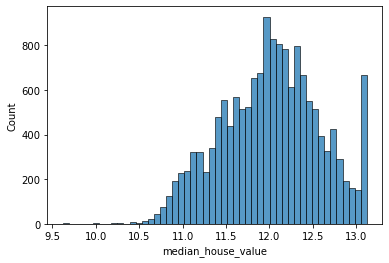

In [28]:
sns.histplot(median_house_value, bins=50)                #plot of the np.log1p(median_house_value)

# Question 3. Missing values

#We need to deal with missing values for the column from Q1.
#We have two options: fill it with 0 or with the mean of this variable.

In [29]:
ocean_cols.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [30]:
ocean_cols['total_bedrooms'].isnull().value_counts()

False    15530
True       157
Name: total_bedrooms, dtype: int64

In [31]:
total_bedrooms_mean = ocean_cols['total_bedrooms'].mean()
total_bedrooms_mean

541.2446877012235

In [32]:
total_bedrooms_zero = ocean_cols['total_bedrooms'].fillna(0)

In [33]:
total_bedrooms_mean = ocean_cols['total_bedrooms'].fillna(total_bedrooms_mean)

In [34]:
total_bedrooms_zero.isnull().sum()

0

In [35]:
total_bedrooms_mean.isnull().sum()

0

In [36]:
ocean_cols.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

#Try both options. For each, train a linear regression model without regularization using the code from the lessons.

#Use the validation dataset to evaluate the models and compare the RMSE of each option.

#Round the RMSE scores to 2 decimal digits using round(score, 2)

In [37]:
# get the features X for each dataset

X_train = ocean_cols_train.drop('median_house_value', axis=1).values

X_val = ocean_cols_val.drop('median_house_value', axis=1).values

X_test = ocean_cols_test.drop('median_house_value', axis=1).values

In [38]:
len(X_train), len(X_val), len(X_test)

(9413, 3137, 3137)

In [39]:
# get the target y for each dataset

y_train = np.log1p(ocean_cols_train['median_house_value'].values)

y_val = np.log1p(ocean_cols_val['median_house_value'].values)

y_test = np.log1p(ocean_cols_test['median_house_value'].values)

In [40]:
len(y_train), len(y_val), len(y_test)

(9413, 3137, 3137)

#use function to get our parameters for fillna(0)

In [41]:
def get_X(ocean_cols):
    
    ocean_cols = ocean_cols.drop('median_house_value', axis=1).fillna(0).values
    X = ocean_cols
    
    return X

In [42]:
def linear_regression(X, y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    X_transpose = X.T
    X_trans_dot = X_transpose.dot(X)
    X_inv = np.linalg.inv(X_trans_dot)
    
    w_full = X_inv.dot(X_transpose).dot(y)
    
    return w_full[0], w_full[1:]

In [43]:
def rmse(y, y_pred):
    
    error = y - y_pred
    squared_error = error**2
    mean_square_error = squared_error.mean()
    score = np.sqrt(mean_square_error)
    
    return round(score, 2)

In [44]:
X_train = get_X(ocean_cols_train)
w0, w = linear_regression(X_train,y_train)

X_val = get_X(ocean_cols_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.34

#use function to get our parameters for fillna(mean)

In [45]:
def get_X_mean(ocean_cols):
    
    ocean_cols = ocean_cols.drop('median_house_value', axis=1).fillna(ocean_cols.mean()).values
    X = ocean_cols
    
    return X

In [46]:
X_train = get_X_mean(ocean_cols_train)
w0, w = linear_regression(X_train,y_train)

X_val = get_X_mean(ocean_cols_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.34

# Question 4. Regularization

#Now let's train a regularized linear regression.

#For this question, fill the NAs with 0.

#Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

#Use RMSE to evaluate the model on the validation dataset.

#Round the RMSE scores to 2 decimal digits.

#Which r gives the best RMSE?

In [47]:
def get_X(ocean_cols):
    
    ocean_cols = ocean_cols.drop('median_house_value', axis=1).fillna(0).values
    X = ocean_cols
    
    return X

In [48]:
def linear_regression_r(X, y, r):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    X_transpose = X.T
    X_trans_dot = X_transpose.dot(X)
    X_reg = X_trans_dot + r * np.eye(X_trans_dot.shape[0])
    X_reg_inv = np.linalg.inv(X_reg)
    
    w_full = X_reg_inv.dot(X_transpose).dot(y)
    
    return w_full[0], w_full[1:]                   

In [49]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = get_X(ocean_cols_train)
    w0, w = linear_regression_r(X_train,y_train, r=r)

    X_val = get_X(ocean_cols_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)
    
    print(r, w0, round(score, 2))

0 -9.763249477687737 0.34
1e-06 -9.763228830502902 0.34
0.0001 -9.761185235314796 0.34
0.001 -9.74264624941128 0.34
0.01 -9.561056193074688 0.34
0.1 -8.058889769662885 0.34
1 -3.1331542782853083 0.34
5 -0.8410867975248791 0.35
10 -0.4381172315427366 0.35


# Question 5. Using a different Seed Value

#We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

#Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

#For each seed, do the train/validation/test split with 60%/20%/20% distribution.

#Fill the missing values with 0 and train a model without regularization.

#For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

#What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

#Round the result to 3 decimal digits (round(std, 3))

In [50]:
def get_X_seed(ocean_cols):
    
    ocean_cols = ocean_cols.drop('median_house_value', axis=1).fillna(0).values
    seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    for s in seed_values:
        n = len(ocean_cols)
        n_val = int(n * 0.2)
        n_test = int(n * 0.2)
        n_train = n - n_val - n_test
        idx = np.arange(n)
        np.random.seed(s)
        np.random.shuffle(idx)
        
    return ocean_cols[idx[:n_train]], ocean_cols[idx[n_train:n_train+n_val]], ocean_cols[idx[n_train+n_val:]]

In [51]:
get_X_seed(ocean_cols)

(array([[-117.05  ,   32.82  ,   16.    , ..., 1684.    ,  701.    ,
            4.2312],
        [-118.    ,   33.91  ,   19.    , ..., 2374.    ,  753.    ,
            5.979 ],
        [-121.96  ,   37.25  ,   35.    , ...,  484.    ,  174.    ,
            6.1648],
        ...,
        [-117.01  ,   32.76  ,   22.    , ..., 1800.    ,  769.    ,
            2.8594],
        [-117.1   ,   34.57  ,    6.    , ..., 1938.    ,  724.    ,
            3.1917],
        [-118.03  ,   33.93  ,   35.    , ..., 1386.    ,  411.    ,
            5.2736]]),
 array([[-1.2013e+02,  3.7930e+01,  5.0000e+00, ...,  5.8000e+01,
          2.5000e+01,  1.6750e+00],
        [-1.1906e+02,  3.5330e+01,  1.4000e+01, ...,  3.2780e+03,
          1.0490e+03,  3.8117e+00],
        [-1.1689e+02,  3.3930e+01,  2.9000e+01, ...,  2.4940e+03,
          9.1200e+02,  2.0976e+00],
        ...,
        [-1.1699e+02,  3.2850e+01,  3.2000e+01, ...,  3.0250e+03,
          9.4800e+02,  4.0931e+00],
        [-1.2268e+02,  3

In [52]:
def linear_regression_seed(X, y, s):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
      
    X_transpose = X.T
    X_trans_dot = X_transpose.dot(X)
    X_reg = X_trans_dot + r * np.eye(X_trans_dot.shape[0])
    X_reg_inv = np.linalg.inv(X_reg)
    
    w_full = X_reg_inv.dot(X_transpose).dot(y)
    
    return w_full[0], w_full[1:]                      

In [ ]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    X_train = get_X_seed(ocean_cols_train)
    w0, w = linear_regression_seed(X_train,y_train,s=s)

    X_val = get_X_seed(ocean_cols_val)
    y_pred = w0 + X_val.dot(w)
    score = np.std(rmse(y_val,y_pred))
    
    print(s, w0, round(score, 2))

# Question 6

#Split the dataset like previously, use seed 9.

#Combine train and validation datasets.

#Fill the missing values with 0 and train a model with r=0.001.

#What's the RMSE on the test dataset?


In [53]:
m = len(ocean_cols)
m_val = int(m * 0.2)
m_test = int(m * 0.2)
m_train = m - m_val - m_test

In [54]:
m, m_val, m_test, m_train

(15687, 3137, 3137, 9413)

In [55]:
idx = np.arange(m)
np.random.seed(9)
np.random.shuffle(idx)

In [56]:
idx

array([11994,  5634, 13629, ...,  6782,  4444,  8574])

In [57]:
ocean_cols_train = ocean_cols.iloc[idx[:m_train]]

ocean_cols_val = ocean_cols.iloc[idx[m_train:m_train + m_val]]

ocean_cols_test = ocean_cols.iloc[idx[m_train + m_val:]]

In [58]:
ocean_cols_train = ocean_cols_train.reset_index(drop=True)

ocean_cols_val = ocean_cols_val.reset_index(drop=True)

ocean_cols_test = ocean_cols_test.reset_index(drop=True)

In [59]:
len(ocean_cols_train), len(ocean_cols_val), len(ocean_cols_test) 

(9413, 3137, 3137)

In [60]:
ocean_full_train = pd.concat([ocean_cols_train,ocean_cols_val])

In [61]:
ocean_full_train = ocean_full_train.reset_index(drop=True)
ocean_full_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-117.05,32.82,16.0,4046.0,731.0,1684.0,701.0,4.2312,197000.0
1,-118.00,33.91,19.0,5166.0,770.0,2374.0,753.0,5.9790,285200.0
2,-121.96,37.25,35.0,1018.0,169.0,484.0,174.0,6.1648,371900.0
3,-121.89,37.30,47.0,1604.0,284.0,639.0,278.0,5.8415,283300.0
4,-118.14,33.96,34.0,2744.0,541.0,1333.0,503.0,4.0536,277200.0
...,...,...,...,...,...,...,...,...,...
12545,-121.14,38.92,16.0,2069.0,312.0,889.0,299.0,4.6771,212000.0
12546,-118.25,33.93,42.0,763.0,191.0,754.0,174.0,2.0486,101800.0
12547,-116.99,32.85,32.0,5211.0,949.0,3025.0,948.0,4.0931,134200.0
12548,-122.68,38.48,15.0,1575.0,262.0,716.0,259.0,5.3409,244600.0


In [62]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 12.53968723,
       12.34279083, 11.97477721])

In [63]:
r = 0.001
X_full_train = get_X(ocean_full_train)
w0, w = linear_regression_r(X_full_train, y_full_train, r=r)

X_test = get_X(ocean_cols_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)
score

0.56

In [64]:
#Using scikit learn:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(y_test,y_pred))
print('mae : ', mean_absolute_error(y_test, y_pred))
print('mse : ', mean_squared_error(y_test, y_pred))
print('rmse : ', np.sqrt(mean_absolute_error(y_test, y_pred)))

0.00024853941876812335
mae :  0.4481965350198676
mse :  0.31171975303682203
rmse :  0.6694748203030997
